# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [2]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [5]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv('api.env')

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [6]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [7]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [8]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [14]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19161381,
            "id": 1,
            "last_updated": 1664219916,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 367769682370,
                    "percent_change_1h": 0.125888243424777,
                    "percent_change_24h": 1.01745575934513,
                    "percent_change_7d": -1.33570511784795,
                    "percentage_change_1h": 0.125888243424777,
                    "percentage_change_24h": 1.01745575934513,
                    "percentage_change_7d": -1.33570511784795,
                    "price": 19177.53,
                    "volume_24h": 41883716465
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19161381,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

In [16]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 120694146,
            "id": 1027,
            "last_updated": 1664228033,
            "max_supply": 120693472,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 159556295171,
                    "percent_change_1h": -0.324088535272035,
                    "percent_change_24h": 2.61831551869421,
                    "percent_change_7d": -1.01297493775053,
                    "percentage_change_1h": -0.324088535272035,
                    "percentage_change_24h": 2.61831551869421,
                    "percentage_change_7d": -1.01297493775053,
                    "price": 1322.32,
                    "volume_24h": 15860703532
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120694146,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cr

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [21]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
btc_price


19177.53

In [22]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
eth_price


1322.32

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [23]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
btc_value



23013.035999999996

In [24]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
eth_value


7008.295999999999

In [25]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
total_crypto_wallet


30021.331999999995

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [26]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [27]:
load_dotenv('api.env')

# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2')


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [28]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1Day
timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp('2022-09-23', tz="America/New_York").isoformat()
end_date = pd.Timestamp('2022-09-23', tz='America/New_York').isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [29]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
spy_prices = prices_df[prices_df['symbol'] == 'SPY'].drop('symbol', axis=1)
agg_prices = prices_df[prices_df['symbol'] == 'AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([spy_prices, agg_prices], axis=1, keys=['SPY', 'AGG'])

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()


SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2022-09-23 04:00:00+00:00  370.58  370.62  363.29  367.95  121574096   

                                                    AGG                      \
                          trade_count        vwap  open   high    low close   
timestamp                                                                     
2022-09-23 04:00:00+00:00      838774  367.579806  97.4  97.45  96.89  97.2   

                                                            
                             volume trade_count       vwap  
timestamp                                                   
2022-09-23 04:00:00+00:00  11053650       41351  97.135798

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [34]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df['AGG']['close'][0])

# Print the AGG closing price
agg_close_price


97.2

In [36]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df['SPY']['close'][0])

# Print the SPY closing price
spy_close_price


367.95

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [38]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
agg_value

19440.0

In [37]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
spy_value

40474.5

In [39]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
total_stocks_bonds


59914.5

In [43]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
total_portfolio


89935.832

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [44]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[30021.331999999995, 59914.5]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [46]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    savings_data,
    columns=['amount'],
    index=['crypto', 'stock/bond'])

# Display the savings_df DataFrame
display(savings_df)


,amount
crypto,30021.332
stock/bond,59914.500


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Contribution to Portfolio by Asset Type'}, ylabel='amount'>

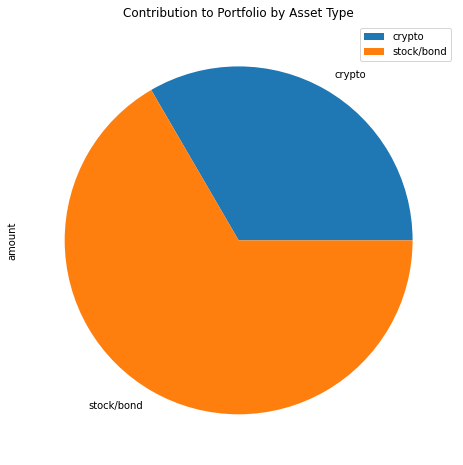

In [50]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot(kind='pie', y='amount', title='Contribution to Portfolio by Asset Type',figsize=(8,8))


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [84]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [52]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congrats! You got enough money.")
elif total_portfolio == emergency_fund_value:
    print("Congrats! You reached an important financial goal.")
else:
    print(f"Uh oh. You are {emergency_fund_value - total_portfolio} away from reaching your goal.")


Congrats! You got enough money.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [53]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp('09-23-2019', tz='America/New_York').isoformat()

In [54]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date).df

# Reorganize the DataFrame
# Separate ticker data
SPY = prices_df[prices_df['symbol'] == 'SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol'] == 'AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, AGG], axis=1, keys=['SPY', 'AGG'])

# Display both the first and last five rows of the DataFrame
display(prices_df.head())
display(prices_df.tail())


SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-09-23 04:00:00+00:00  297.57  299.0000  297.27  298.21  47541342   
2019-09-24 04:00:00+00:00  299.41  299.8400  294.81  295.87  97717924   
2019-09-25 04:00:00+00:00  295.94  298.1100  294.33  297.62  73434081   
2019-09-26 04:00:00+00:00  297.62  297.8600  295.45  297.00  58758157   
2019-09-27 04:00:00+00:00  297.87  297.9465  293.69  295.40  85194715   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2019-09-23 04:00:00+00:00      221295  298.257134  113.02  113.2400  112.940   
2019-09-24 04:00:00+00:00      519834  296.679211  113.03  113.3550  113.030   
2019-09-25 04:00:00+00:00      356047  296.713554  113.21  113.2299  112.740   
2019-09-26 04:00:00+00:00      329411  296.847045  113.00  113.1000  112.935   
2019-09-27 04:00:00+00:00      454922  295.623896  113.00  113.1650  113.000   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-09-23 04:00:00+00:00  112.97  3412384       11277  113.041895  
2019-09-24 04:00:00+00:00  113.28  2602618       13029  113.194793  
2019-09-25 04:00:00+00:00  112.81  3813759       14274  112.882363  
2019-09-26 04:00:00+00:00  113.00  4869355       11034  113.027123  
2019-09-27 04:00:00+00:00  113.14  4652474       15910  113.108829

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2022-09-20 04:00:00+00:00  385.10  386.12  381.1950  384.09   76685764   
2022-09-21 04:00:00+00:00  386.06  389.31  377.3800  377.45  104302139   
2022-09-22 04:00:00+00:00  376.50  378.30  373.4400  374.22   88922900   
2022-09-23 04:00:00+00:00  370.58  370.62  363.2900  367.95  121574096   
2022-09-26 04:00:00+00:00  366.41  370.21  363.0299  364.31   91679069   

                                                     AGG                    \
                          trade_count        vwap   open     high      low   
timestamp                                                                    
2022-09-20 04:00:00+00:00      555454  384.152364  98.20  98.4000  98.0800   
2022-09-21 04:00:00+00:00      807310  383.197346  98.40  98.6001  97.8600   
2022-09-22 04:00:00+00:00      630401  375.330794  97.90  97.9200  97.4039   
2022-09-23 04:00:00+00:00      838774  367.579806  97.40  97.4500  96.8900   
2022-09-26 04:00:00+00:00      630216  365.932638  96.87  96.9100  95.8650   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2022-09-20 04:00:00+00:00  98.24  11210119       22324  98.237305  
2022-09-21 04:00:00+00:00  98.55   6674502       32613  98.321112  
2022-09-22 04:00:00+00:00  97.50   7092118       25072  97.595666  
2022-09-23 04:00:00+00:00  97.20  11053650       41351  97.135798  
2022-09-26 04:00:00+00:00  95.95   8467458       32084  96.272692

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [55]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC = MCSimulation(
    prices_df,
    weights=[.6, .4],
    num_simulation=500,
    num_trading_days=30*252)

# Review the simulation input data
MC.portfolio_data


SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2019-09-23 04:00:00+00:00  297.57  299.0000  297.2700  298.21   47541342   
2019-09-24 04:00:00+00:00  299.41  299.8400  294.8100  295.87   97717924   
2019-09-25 04:00:00+00:00  295.94  298.1100  294.3300  297.62   73434081   
2019-09-26 04:00:00+00:00  297.62  297.8600  295.4500  297.00   58758157   
2019-09-27 04:00:00+00:00  297.87  297.9465  293.6900  295.40   85194715   
...                           ...       ...       ...     ...        ...   
2022-09-20 04:00:00+00:00  385.10  386.1200  381.1950  384.09   76685764   
2022-09-21 04:00:00+00:00  386.06  389.3100  377.3800  377.45  104302139   
2022-09-22 04:00:00+00:00  376.50  378.3000  373.4400  374.22   88922900   
2022-09-23 04:00:00+00:00  370.58  370.6200  363.2900  367.95  121574096   
2022-09-26 04:00:00+00:00  366.41  370.2100  363.0299  364.31   91679069   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-09-23 04:00:00+00:00      221295  298.257134          NaN  113.02   
2019-09-24 04:00:00+00:00      519834  296.679211    -0.007847  113.03   
2019-09-25 04:00:00+00:00      356047  296.713554     0.005915  113.21   
2019-09-26 04:00:00+00:00      329411  296.847045    -0.002083  113.00   
2019-09-27 04:00:00+00:00      454922  295.623896    -0.005387  113.00   
...                               ...         ...          ...     ...   
2022-09-20 04:00:00+00:00      555454  384.152364    -0.011479   98.20   
2022-09-21 04:00:00+00:00      807310  383.197346    -0.017288   98.40   
2022-09-22 04:00:00+00:00      630401  375.330794    -0.008557   97.90   
2022-09-23 04:00:00+00:00      838774  367.579806    -0.016755   97.40   
2022-09-26 04:00:00+00:00      630216  365.932638    -0.009893   96.87   

                                                                             \
                               high       low   close    volume trade_count   
timestamp                                                                     
2019-09-23 04:00:00+00:00  113.2400  112.9400  112.97   3412384       11277   
2019-09-24 04:00:00+00:00  113.3550  113.0300  113.28   2602618       13029   
2019-09-25 04:00:00+00:00  113.2299  112.7400  112.81   3813759       14274   
2019-09-26 04:00:00+00:00  113.1000  112.9350  113.00   4869355       11034   
2019-09-27 04:00:00+00:00  113.1650  113.0000  113.14   4652474       15910   
...                             ...       ...     ...       ...         ...   
2022-09-20 04:00:00+00:00   98.4000   98.0800   98.24  11210119       22324   
2022-09-21 04:00:00+00:00   98.6001   97.8600   98.55   6674502       32613   
2022-09-22 04:00:00+00:00   97.9200   97.4039   97.50   7092118       25072   
2022-09-23 04:00:00+00:00   97.4500   96.8900   97.20  11053650       41351   
2022-09-26 04:00:00+00:00   96.9100   95.8650   95.95   8467458       32084   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-09-23 04:00:00+00:00  113.041895          NaN  
2019-09-24 04:00:00+00:00  113.194793     0.002744  
2019-09-25 04:00:00+00:00  112.882363    -0.004149  
2019-09-26 04:00:00+00:00  113.027123     0.001684  
2019-09-27 04:00:00+00:00  113.108829     0.001239  
...                               ...          ...  
2022-09-20 04:00:00+00:00   98.237305    -0.004459  
2022-09-21 04:00:00+00:00   98.321112     0.003156  
2022-09-22 04:00:00+00:00   97.595666    -0.010654  
2022-09-23 04:00:00+00:00   97.135798    -0.003077  
2022-09-26 04:00:00+00:00   96.272692    -0.012860  

[759 rows x 16 columns]

In [56]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/andrewisrael/Desktop/Columbia FinTech Bootcamp/Challenges/5-Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

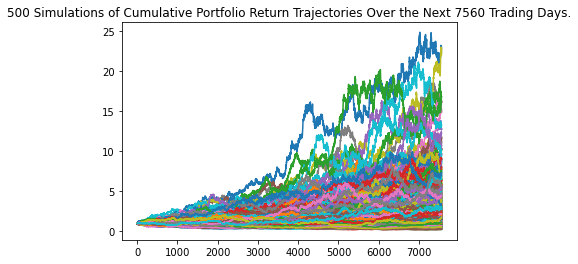

In [57]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

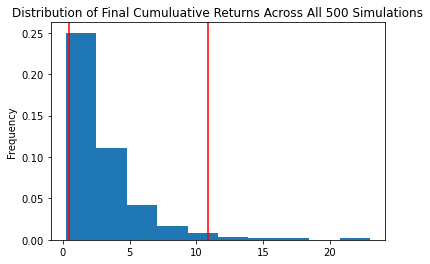

In [58]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [60]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
summary_stats = MC.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
summary_stats

count           500.000000
mean              3.093387
std               2.924972
min               0.227047
25%               1.276469
50%               2.145435
75%               3.863419
max              23.008947
95% CI Lower      0.472130
95% CI Upper     10.893868
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [77]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"Current balance of stock/bond portfolio: ${total_stocks_bonds}")


Current balance of stock/bond portfolio: $59914.5


In [78]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = summary_stats[8]
ci_upper_thirty_cumulative_return = summary_stats[9]

# Print the result of your calculations
print(f"95% Confidence Interval for 30Y outcomes of stock/bond portfolio: (${total_stocks_bonds*ci_lower_thirty_cumulative_return:.2f}, ${total_stocks_bonds*ci_upper_thirty_cumulative_return:.2f})")


95% Confidence Interval for 30Y outcomes of stock/bond portfolio: ($28287.42, $652700.64)


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [69]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_10Y = MCSimulation(
    prices_df,
    weights = [.8, .2],
    num_simulation=500,
    num_trading_days=252*10)

# Review the simulation input data
MC_10Y.portfolio_data


SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2019-09-23 04:00:00+00:00  297.57  299.0000  297.2700  298.21   47541342   
2019-09-24 04:00:00+00:00  299.41  299.8400  294.8100  295.87   97717924   
2019-09-25 04:00:00+00:00  295.94  298.1100  294.3300  297.62   73434081   
2019-09-26 04:00:00+00:00  297.62  297.8600  295.4500  297.00   58758157   
2019-09-27 04:00:00+00:00  297.87  297.9465  293.6900  295.40   85194715   
...                           ...       ...       ...     ...        ...   
2022-09-20 04:00:00+00:00  385.10  386.1200  381.1950  384.09   76685764   
2022-09-21 04:00:00+00:00  386.06  389.3100  377.3800  377.45  104302139   
2022-09-22 04:00:00+00:00  376.50  378.3000  373.4400  374.22   88922900   
2022-09-23 04:00:00+00:00  370.58  370.6200  363.2900  367.95  121574096   
2022-09-26 04:00:00+00:00  366.41  370.2100  363.0299  364.31   91679069   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-09-23 04:00:00+00:00      221295  298.257134          NaN  113.02   
2019-09-24 04:00:00+00:00      519834  296.679211    -0.007847  113.03   
2019-09-25 04:00:00+00:00      356047  296.713554     0.005915  113.21   
2019-09-26 04:00:00+00:00      329411  296.847045    -0.002083  113.00   
2019-09-27 04:00:00+00:00      454922  295.623896    -0.005387  113.00   
...                               ...         ...          ...     ...   
2022-09-20 04:00:00+00:00      555454  384.152364    -0.011479   98.20   
2022-09-21 04:00:00+00:00      807310  383.197346    -0.017288   98.40   
2022-09-22 04:00:00+00:00      630401  375.330794    -0.008557   97.90   
2022-09-23 04:00:00+00:00      838774  367.579806    -0.016755   97.40   
2022-09-26 04:00:00+00:00      630216  365.932638    -0.009893   96.87   

                                                                             \
                               high       low   close    volume trade_count   
timestamp                                                                     
2019-09-23 04:00:00+00:00  113.2400  112.9400  112.97   3412384       11277   
2019-09-24 04:00:00+00:00  113.3550  113.0300  113.28   2602618       13029   
2019-09-25 04:00:00+00:00  113.2299  112.7400  112.81   3813759       14274   
2019-09-26 04:00:00+00:00  113.1000  112.9350  113.00   4869355       11034   
2019-09-27 04:00:00+00:00  113.1650  113.0000  113.14   4652474       15910   
...                             ...       ...     ...       ...         ...   
2022-09-20 04:00:00+00:00   98.4000   98.0800   98.24  11210119       22324   
2022-09-21 04:00:00+00:00   98.6001   97.8600   98.55   6674502       32613   
2022-09-22 04:00:00+00:00   97.9200   97.4039   97.50   7092118       25072   
2022-09-23 04:00:00+00:00   97.4500   96.8900   97.20  11053650       41351   
2022-09-26 04:00:00+00:00   96.9100   95.8650   95.95   8467458       32084   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-09-23 04:00:00+00:00  113.041895          NaN  
2019-09-24 04:00:00+00:00  113.194793     0.002744  
2019-09-25 04:00:00+00:00  112.882363    -0.004149  
2019-09-26 04:00:00+00:00  113.027123     0.001684  
2019-09-27 04:00:00+00:00  113.108829     0.001239  
...                               ...          ...  
2022-09-20 04:00:00+00:00   98.237305    -0.004459  
2022-09-21 04:00:00+00:00   98.321112     0.003156  
2022-09-22 04:00:00+00:00   97.595666    -0.010654  
2022-09-23 04:00:00+00:00   97.135798    -0.003077  
2022-09-26 04:00:00+00:00   96.272692    -0.012860  

[759 rows x 16 columns]

In [70]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10Y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/andrewisrael/Desktop/Columbia FinTech Bootcamp/Challenges/5-Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992835,1.002829,1.008482,1.014231,1.000404,1.004685,0.989771,1.015012,1.017381,1.001422,...,1.008391,0.995030,0.989029,0.992774,0.991129,1.002328,1.010346,0.994672,1.012283,0.983673
2,0.977351,1.017105,1.012460,1.003018,1.003283,0.991026,0.990362,1.020592,1.022728,1.005433,...,1.019892,0.988777,0.978835,1.016144,0.993069,1.010232,1.020682,0.994579,1.016724,0.979880
3,0.982943,1.025719,1.014704,1.005984,1.023390,0.964330,0.976334,1.030175,1.010809,1.013583,...,1.017997,0.980953,0.943278,1.011732,0.993152,1.022981,1.026149,1.013399,1.005338,0.970351
4,0.985444,1.036801,1.021657,1.011888,1.019894,0.961296,0.998905,1.046748,1.016217,1.012796,...,1.019459,0.967943,0.929487,1.019221,1.000720,1.016912,1.019610,1.022907,1.005326,0.947639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.786551,1.498580,0.565869,1.102125,1.786469,1.622752,0.465457,1.068290,1.697292,2.604502,...,0.599368,2.751288,1.388086,0.548761,1.360658,2.165386,2.182586,1.078548,1.822163,2.397407
2517,0.772839,1.486051,0.561851,1.098374,1.804565,1.618827,0.471825,1.066308,1.692154,2.625292,...,0.596236,2.735009,1.377877,0.557562,1.354156,2.168862,2.136804,1.075393,1.850193,2.398744
2518,0.756315,1.500540,0.571913,1.105653,1.801599,1.596179,0.471073,1.079104,1.683521,2.636769,...,0.597136,2.740479,1.369227,0.556579,1.349014,2.161090,2.114824,1.094019,1.823889,2.419146
2519,0.754629,1.524104,0.566388,1.118096,1.811724,1.625334,0.473625,1.074355,1.707765,2.611626,...,0.604732,2.718948,1.355178,0.575178,1.380316,2.181002,2.085410,1.056860,1.811507,2.424479


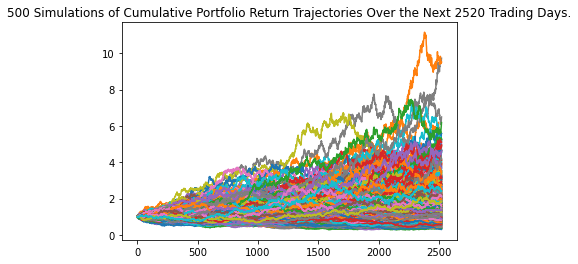

In [72]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10Y_sim_line_plot = MC_10Y.plot_simulation()


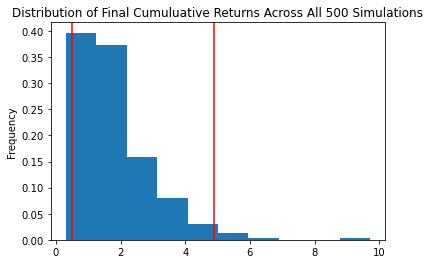

In [73]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10Y_sim_dist_plot = MC_10Y.plot_distribution()


In [74]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_10Y_summary_stats = MC_10Y.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
MC_10Y_summary_stats

count           500.000000
mean              1.818019
std               1.176114
min               0.302583
25%               1.023450
50%               1.507077
75%               2.273827
max               9.721015
95% CI Lower      0.479199
95% CI Upper      4.902631
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [80]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"Current balance of stock and bond portion of portfolio: ${total_stocks_bonds:2f}")


Current balance of stock and bond portion of portfolio: $59914.500000


In [82]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_10Y_summary_stats[8]
ci_upper_ten_cumulative_return = MC_10Y_summary_stats[9]

# Print the result of your calculations
print(f"95% confidence interval for stock/bond portfolio value in 10 years: (${ci_lower_ten_cumulative_return*total_stocks_bonds:.2f}, ${ci_upper_ten_cumulative_return*total_stocks_bonds: .2f})")


95% confidence interval for stock/bond portfolio value in 10 years: ($28710.94, $ 293738.69)


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

Answer No. Allocating more havily to stocks for 10 years leaves us with a 2.5% probability that the portfolio will be worth $28,710.94 or less. This is lower than the necessary savings amount of $36,000. 